In [1]:
# Notebooks
import nbimporter
import os
import sys

# Functions from src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Defined Functions
from utils import *

# Pandas, matplotlib, pickle, seaborn
import pickle
import numpy as np
import pandas as pd

# Sklearn
from sklearn import preprocessing


In [2]:
# Global variables
train_test_split = 0.7 # for main train/validation split
random_state = 100 # randome seed


# Occutherm

In [3]:
# load TCS dataset
df_tcs = pd.read_pickle("data/occutherm/df_feature1.pkl")

test_size_percentage = 0.2 # for CV within train split
user_split = True #split train and test user-based or completely stratfied
use_heuristics_participants = False

print(df_tcs.describe())


       Participant_No  Temperature (Fahrenheit)  SkinTemperature  \
count     2067.000000               2067.000000      2067.000000   
mean        40.233188                 71.388912        85.144962   
std         23.315812                  6.227013         5.236758   
min          1.000000                 60.070000        62.986781   
25%         20.000000                 65.500000        81.980755   
50%         41.000000                 70.199997        85.382000   
75%         60.000000                 77.599998        88.465402   
max         80.000000                 85.000000       110.235782   

       ClothingInsulation   Height(cm)  Shoulder Circumference(cm)  \
count         2067.000000  2067.000000                 2067.000000   
mean             0.565070   170.134736                  109.284857   
std              0.192765     9.651437                   10.906837   
min              0.000000   151.000000                   89.500000   
25%              0.410000   163.65000

## Original labels

In [4]:
df_aux_65 = pd.read_csv("data/occutherm/TCS_65_participants_outsideData.csv", delimiter = ",")

list_complete_participants = list(df_aux_65['Participant_No'].unique())

if use_heuristics_participants:
    list_complete_participants.append(10)
    list_complete_participants.append(26)
    list_complete_participants.append(28)
    list_complete_participants.append(36)
    list_complete_participants.append(37)
    list_complete_participants.append(39)
    list_complete_participants.append(47)
    list_complete_participants.append(48)
    list_complete_participants.append(53)

num_complete_participants = len(list_complete_participants)
print("Complete Participants: {}".format(list_complete_participants))
print("Total number of complete participants: {}".format(num_complete_participants))

df_tcs_train, df_tcs_test, _, _ = train_test_split_holistics(df_tcs, list_complete_participants,
                                                               user_split = user_split, train_test_split = train_test_split)
print("Total number of instances: {}".format(df_tcs.shape[0]))
print(df_tcs['Discrete Thermal Comfort_TA'].value_counts())

print("\nNumber of training instances: {}".format(df_tcs_train.shape[0]))
print(df_tcs_train['Discrete Thermal Comfort_TA'].value_counts())

print("\nNumber of testing instances: {}".format(df_tcs_test.shape[0]))
print(df_tcs_test['Discrete Thermal Comfort_TA'].value_counts())

print(df_tcs_train.columns.values)
print(df_tcs_train.dtypes)

df_tcs_train.to_pickle('data/occutherm/df_feature1_train.pkl')
df_tcs_test.to_pickle('data/occutherm/df_feature1_test.pkl')
df_tcs_train.to_csv('data/occutherm/df_feature1_train.csv', index=False, header=False)
df_tcs_test.to_csv('data/occutherm/df_feature1_test.csv', index=False, header=False)


Complete Participants: [1, 2, 4, 5, 6, 7, 8, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Total number of complete participants: 65
Num participants in test set: 20
Testing on participants:
[ 4  7  8 21 25 29 40 41 43 57 58 59 61 64 66 68 70 71 73 80]
Total number of instances: 2067
 0    1152
-1     452
-2     217
 1     198
 2      48
Name: Discrete Thermal Comfort_TA, dtype: int64

Number of training instances: 1508
 0    818
-1    303
-2    172
 1    171
 2     44
Name: Discrete Thermal Comfort_TA, dtype: int64

Number of testing instances: 559
 0    334
-1    149
-2     45
 1     27
 2      4
Name: Discrete Thermal Comfort_TA, dtype: int64
['Temperature (Fahrenheit)' 'SkinTemperature' 'ClothingInsulation'
 'Height(cm)' 'Shoulder Circumference(cm)' 'Weight(lbs)' 'Gender'
 'Temperature_outside' 'Hum

## Reduced labels

In [8]:
def remap_occutherm(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0


In [11]:
df_tcs_train_reduced = df_tcs_train.copy()
df_tcs_test_reduced = df_tcs_test.copy()

df_tcs_train_reduced['Discrete Thermal Comfort_TA'] = df_tcs_train_reduced['Discrete Thermal Comfort_TA'].apply(remap_occutherm)
df_tcs_test_reduced['Discrete Thermal Comfort_TA'] = df_tcs_test_reduced['Discrete Thermal Comfort_TA'].apply(remap_occutherm)

df_tcs_train_reduced.to_pickle('data/occutherm/df_feature1_train_reduced.pkl')
df_tcs_test_reduced.to_pickle('data/occutherm/df_feature1_test_reduced.pkl')
df_tcs_train_reduced.to_csv('data/occutherm/df_feature1_train_reduced.csv', index=False, header=False)
df_tcs_test_reduced.to_csv('data/occutherm/df_feature1_test_reduced.csv', index=False, header=False)


# Cresh

The preprocessing of the data is already done in [this paper](https://www.researchgate.net/publication/338527635_Indoor_Comfort_Personalities_Scalable_Occupant_Preference_Capture_Using_Micro_Ecological_Momentary_Assessments).

We chose the most comprehensive featureset (FS2) since it contains all sensor measurements deployed during the data collection experiment `Feature Set2: Time + Sensing (IoT) + Heart Rate (smartwatch) + mbient (nearbody temperature sensor on smartwatch)`. 


## Thermal comfort as targert variable

### Original labels

In [6]:
# load Cresh dataset
df_cresh = pd.read_csv("data/cresh/2019-11-15_fs2.csv")

# drop user id
df_cresh.drop(columns='user_id', axis=1, inplace=True)

df_cresh_train = pd.read_csv("data/cresh/2019-11-15_fs2_train.csv")
df_cresh_train.drop(columns='user_id', axis=1, inplace=True)

df_cresh_test = pd.read_csv("data/cresh/2019-11-15_fs2_val.csv")
df_cresh_test.drop(columns='user_id', axis=1, inplace=True)

# drop light and noise subjective feedback
df_cresh.drop(columns='light_cozie', axis=1, inplace=True)
df_cresh.drop(columns='noise_cozie', axis=1, inplace=True)

df_cresh_train.drop(columns='light_cozie', axis=1, inplace=True)
df_cresh_train.drop(columns='noise_cozie', axis=1, inplace=True)

df_cresh_test.drop(columns='light_cozie', axis=1, inplace=True)
df_cresh_test.drop(columns='noise_cozie', axis=1, inplace=True)

print("Total number of instances: {}".format(df_cresh.shape[0]))
print(df_cresh['thermal_cozie'].value_counts())

# move thermal comfort response to the end of the dataframe
# train and test split already have this format
df_cresh_y = df_cresh.pop('thermal_cozie')
df_cresh['thermal_cozie'] = df_cresh_y

print("\nNumber of training instances: {}".format(df_cresh_train.shape[0]))
print(df_cresh_train['thermal_cozie'].value_counts())

print("\nNumber of testing instances: {}".format(df_cresh_test.shape[0]))
print(df_cresh_test['thermal_cozie'].value_counts())

print(df_cresh.columns.values)
print(df_cresh_train.dtypes)
df_cresh_train.iloc[:, -1] = df_cresh_train.iloc[:, -1].astype('int64') 

df_cresh.to_pickle('data/cresh/cresh.pkl')
df_cresh_train.to_pickle('data/cresh/cresh_train.pkl')
df_cresh_train.to_csv('data/cresh/cresh_train.csv', index=False, header=False) # for TGAN
df_cresh_test.to_pickle('data/cresh/cresh_test.pkl')


Total number of instances: 1474
10.0    937
11.0    336
9.0     201
Name: thermal_cozie, dtype: int64

Number of training instances: 1159
10.0    713
11.0    280
9.0     166
Name: thermal_cozie, dtype: int64

Number of testing instances: 315
10.0    224
11.0     56
9.0      35
Name: thermal_cozie, dtype: int64
['heartRate_cozie' 'humidity_sensing' 'light_sensing' 'noise_sensing'
 'temperature_sensing' 'temperature_mbient' 'hour_sin' 'hour_cos'
 'day_of_week_sin' 'day_of_week_cos' 'thermal_cozie']
heartRate_cozie        float64
humidity_sensing       float64
light_sensing          float64
noise_sensing          float64
temperature_sensing    float64
temperature_mbient     float64
hour_sin               float64
hour_cos               float64
day_of_week_sin        float64
day_of_week_cos        float64
thermal_cozie          float64
dtype: object


# ASHRAE Thermal Comfort Database

In [3]:
df_ashrae_raw = pd.read_csv("data/ashrae/ashrae_db2.01.csv", low_memory=False, encoding="cp1252")
ashrae_columns = ["Air temperature (¡C)",
                  'SET',
                  'Relative humidity (%)',
                  'Clo',
                  'Air velocity (m/s)',
                  'Met',
                  'Thermal sensation' 
                 ]

df_ashrae_filtered = df_ashrae_raw[df_ashrae_raw.columns.intersection(ashrae_columns)]
print("total number of datapoints: {}".format(len(df_ashrae_filtered)))
# original size (107583, 70)
print(df_ashrae_filtered.columns.values)


total number of datapoints: 107583
['Thermal sensation' 'SET' 'Clo' 'Met' 'Air temperature (¡C)'
 'Relative humidity (%)' 'Air velocity (m/s)']


In [4]:
# removing nans
df_ashrae_filtered_nonull = df_ashrae_filtered[
                                               (df_ashrae_filtered['Thermal sensation'].notna()) &
                                               (df_ashrae_filtered['SET'].notna()) &
                                               (df_ashrae_filtered['Air velocity (m/s)'].notna())] # remove nans rows

df_ashrae_filtered_nonull.loc[:, 'Thermal sensation rounded'] = df_ashrae_filtered.loc[:, 'Thermal sensation'].round(0)
del df_ashrae_filtered_nonull['Thermal sensation']

print("total number of datapoints without a single nan: {} or {}".format(len(df_ashrae_filtered_nonull), 
                                                                         len(df_ashrae_filtered_nonull) / len(df_ashrae_raw) * 100))
print(df_ashrae_filtered_nonull.columns.values)
print(df_ashrae_filtered_nonull.describe())


total number of datapoints without a single nan: 66397 or 61.71699989775337
['SET' 'Clo' 'Met' 'Air temperature (¡C)' 'Relative humidity (%)'
 'Air velocity (m/s)' 'Thermal sensation rounded']
                SET           Clo           Met  Air temperature (¡C)  \
count  66397.000000  66397.000000  66397.000000          66397.000000   
mean      25.772715      0.696338      1.212996             24.357408   
std        3.200367      0.283474      0.235523              3.574222   
min        6.550000      0.030000      0.650000              0.600000   
25%       23.720000      0.510000      1.100000             22.300000   
50%       25.540000      0.660000      1.200000             23.800000   
75%       27.630000      0.780000      1.300000             26.200000   
max       61.530000      2.870000      6.830000             48.800000   

       Relative humidity (%)  Air velocity (m/s)  Thermal sensation rounded  
count           66397.000000        66397.000000               66397.00

/Users/matias/miniconda3/envs/gen-methods/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/matias/miniconda3/envs/gen-methods/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Original labels

In [5]:
# shuffle the dataset
df_ashrae_filtered_nonull = df_ashrae_filtered_nonull.sample(frac=1, random_state=random_state).reset_index(drop=True)
# determine split
idx_split = int(df_ashrae_filtered_nonull.shape[0] * train_test_split)

# split the dataframe
df_ashrae_train = df_ashrae_filtered_nonull.iloc[:idx_split, :]
df_ashrae_test = df_ashrae_filtered_nonull.iloc[idx_split:, :]

# shuffle 
df_ashrae_train = df_ashrae_train.sample(frac=1, random_state=random_state).reset_index(drop=True)
df_ashrae_test = df_ashrae_test.sample(frac=1, random_state=random_state).reset_index(drop=True)


df_ashrae_filtered_nonull.to_pickle('data/ashrae/ashrae.pkl')
df_ashrae_train.to_pickle('data/ashrae/ashrae_train.pkl')
df_ashrae_train.to_csv('data/ashrae/ashrae_train.csv', index=False, header=False) # for TGAN
df_ashrae_test.to_pickle('data/ashrae/ashrae_test.pkl')

print("\nNumber of instances: {}".format(df_ashrae_filtered_nonull.shape[0]))
print(df_ashrae_filtered_nonull['Thermal sensation rounded'].value_counts())

print("\nNumber of training instances: {}".format(df_ashrae_train.shape[0]))
print(df_ashrae_train['Thermal sensation rounded'].value_counts())

print("\nNumber of testing instances: {}".format(df_ashrae_test.shape[0]))
print(df_ashrae_test['Thermal sensation rounded'].value_counts())

print(df_ashrae_filtered_nonull.columns.values)
print(df_ashrae_train.dtypes)



Number of instances: 66397
 0.0    27470
 1.0    12727
-1.0    10406
 2.0     6998
-2.0     4014
 3.0     3068
-3.0     1714
Name: Thermal sensation rounded, dtype: int64

Number of training instances: 46477
 0.0    19271
 1.0     8872
-1.0     7289
 2.0     4889
-2.0     2790
 3.0     2161
-3.0     1205
Name: Thermal sensation rounded, dtype: int64

Number of testing instances: 19920
 0.0    8199
 1.0    3855
-1.0    3117
 2.0    2109
-2.0    1224
 3.0     907
-3.0     509
Name: Thermal sensation rounded, dtype: int64
['SET' 'Clo' 'Met' 'Air temperature (¡C)' 'Relative humidity (%)'
 'Air velocity (m/s)' 'Thermal sensation rounded']
SET                          float64
Clo                          float64
Met                          float64
Air temperature (¡C)         float64
Relative humidity (%)        float64
Air velocity (m/s)           float64
Thermal sensation rounded    float64
dtype: object


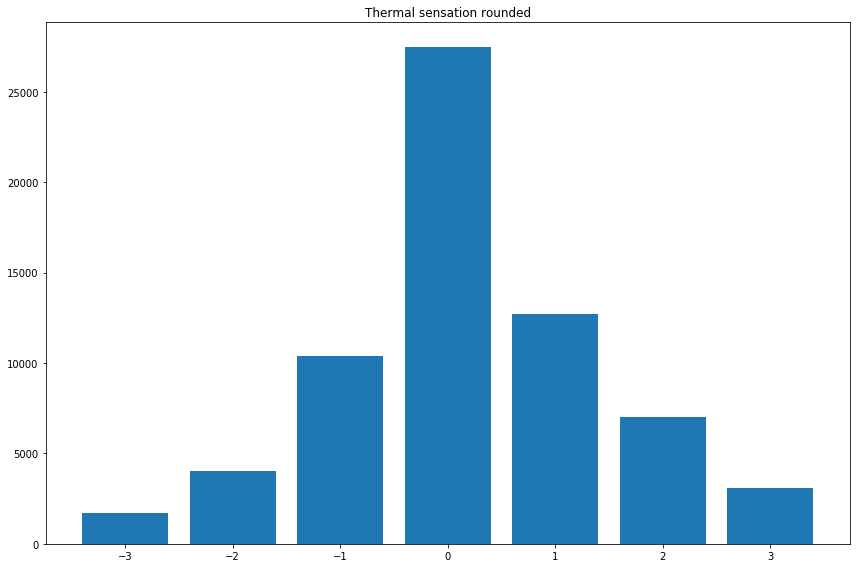

In [6]:
label_str = "Thermal sensation rounded"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
values = df_ashrae_filtered_nonull[label_str].value_counts()
indices = values.index.values
axes.bar(indices, values)
axes.set_title(label_str)
plt.tight_layout()
plt.show()

## Reduced labels

In [7]:
def remap_ashrae(x):
    if x > 0.0:
        return 1.0
    elif x < 0.0:
        return -1.0
    else:
        return 0.0


In [8]:
df_ashrae_filtered_nonull_reduced = df_ashrae_filtered_nonull.copy()
df_ashrae_train_reduced = df_ashrae_train.copy()
df_ashrae_test_reduced = df_ashrae_test.copy()

df_ashrae_filtered_nonull_reduced['Thermal sensation rounded'] = df_ashrae_filtered_nonull_reduced['Thermal sensation rounded'].apply(remap_ashrae)
df_ashrae_train_reduced['Thermal sensation rounded'] = df_ashrae_train_reduced['Thermal sensation rounded'].apply(remap_ashrae)
df_ashrae_test_reduced['Thermal sensation rounded'] = df_ashrae_test_reduced['Thermal sensation rounded'].apply(remap_ashrae)

df_ashrae_train_reduced.to_pickle('data/ashrae/ashrae_train_reduced.pkl')
df_ashrae_train_reduced.to_csv('data/ashrae/ashrae_train_reduced.csv', index=False, header=False) # for TGAN
df_ashrae_test_reduced.to_pickle('data/ashrae/ashrae_test_reduced.pkl')


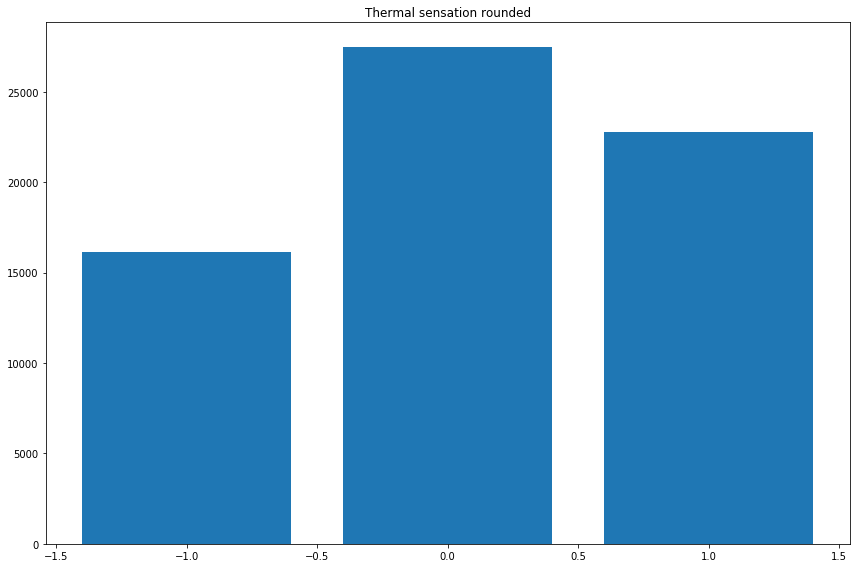

In [20]:
label_str = "Thermal sensation rounded"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
values = df_ashrae_filtered_nonull_reduced[label_str].value_counts()
indices = values.index.values
axes.bar(indices, values)
axes.set_title(label_str)
plt.tight_layout()
plt.show()